# California Housing Price Prediction

DESCRIPTION

Background of Problem Statement :

The US Census Bureau has published California Census Data which has 10 types of metrics such as the population, median income, median housing price, and so on for each block group in California. The dataset also serves as an input for project scoping and tries to specify the functional and nonfunctional requirements for it.

Problem Objective :

The project aims at building a model of housing prices to predict median house values in California using the provided dataset. This model should learn from the data and be able to predict the median housing price in any district, given all the other metrics.

Districts or block groups are the smallest geographical units for which the US Census Bureau
publishes sample data (a block group typically has a population of 600 to 3,000 people). There are 20,640 districts in the project dataset.

Domain: Finance and Housing

Analysis Tasks to be performed:

1. Build a model of housing prices to predict median house values in California using the provided dataset.

2. Train the model to learn from the data to predict the median housing price in any district, given all the other metrics.

3. Predict housing prices based on median_income and plot the regression chart for it.

1. Load the data :

Read the “housing.csv” file from the folder into the program.
Print first few rows of this data.
Extract input (X) and output (Y) data from the dataset.
2. Handle missing values :

Fill the missing values with the mean of the respective column.
3. Encode categorical data :

Convert categorical column in the dataset to numerical data.
4. Split the dataset : 

Split the data into 80% training dataset and 20% test dataset.
5. Standardize data :

Standardize training and test datasets.
6. Perform Linear Regression : 

Perform Linear Regression on training data.
Predict output for test dataset using the fitted model.
Print root mean squared error (RMSE) from Linear Regression.
            [ HINT: Import mean_squared_error from sklearn.metrics ]

7. Bonus exercise: Perform Linear Regression with one independent variable :

Extract just the median_income column from the independent variables (from X_train and X_test).
Perform Linear Regression to predict housing values based on median_income.
Predict output for test dataset using the fitted model.
Plot the fitted model for training data as well as for test data to check if the fitted model satisfies the test data.
Dataset Description :

Field	Description  
longitude	(signed numeric - float) : Longitude value for the block in California, USA  
latitude	(numeric - float ) : Latitude value for the block in California, USA  
housing_median_age	(numeric - int ) : Median age of the house in the block  
total_rooms	(numeric - int ) : Count of the total number of rooms (excluding bedrooms) in all houses in the block  
total_bedrooms	(numeric - float ) : Count of the total number of bedrooms in all houses in the block  
population	(numeric - int ) : Count of the total number of population in the block  
households	(numeric - int ) : Count of the total number of households in the block  
median_income	(numeric - float ) : Median of the total household income of all the houses in the block  
ocean_proximity	(numeric - categorical ) : Type of the landscape of the block [ Unique Values : 'NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'  ]  
median_house_value	(numeric - int ) : Median of the household prices of all the houses in the block  
 

Dataset Size : 20640 rows x 10 columns

In [206]:
import pandas as pd
import numpy as np

In [207]:
ca=pd.read_excel('./dataset/1553768847_housing.xlsx')

In [208]:
ca.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [209]:
ca.info

<bound method DataFrame.info of        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                  41          880           129.0   
1        -122.22     37.86                  21         7099          1106.0   
2        -122.24     37.85                  52         1467           190.0   
3        -122.25     37.85                  52         1274           235.0   
4        -122.25     37.85                  52         1627           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                  25         1665           374.0   
20636    -121.21     39.49                  18          697           150.0   
20637    -121.22     39.43                  17         2254           485.0   
20638    -121.32     39.43                  18         1860           409.0   
20639    -121.24     39.37                  16         2785           616.0   

       population  

In [210]:
ca.shape

(20640, 10)

In [211]:
ca.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [212]:
ca.describe(include='all')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640,20640.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1H OCEAN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9136,NaN
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,NaN,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,NaN,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,NaN,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,NaN,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,NaN,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,NaN,264725.000000


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

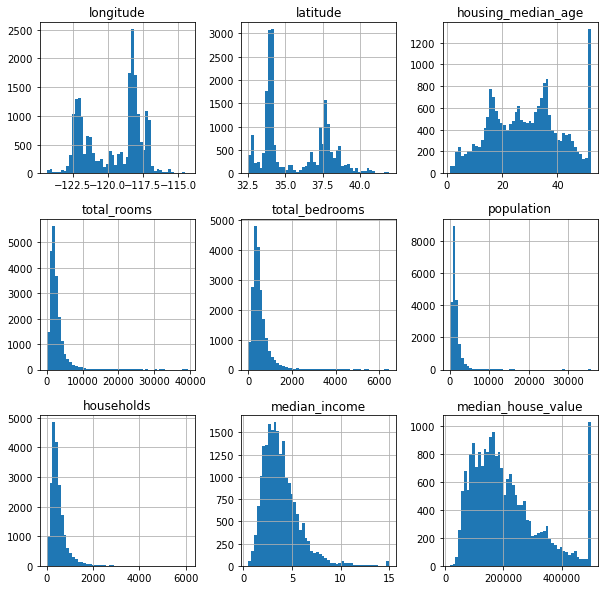

In [213]:
ca.hist(bins=50, figsize=(10, 10))

In [214]:
# substitite the missing values by the mean
# if(condition, TRUE, FALSE)
# np.where(condition, value if true, value if false)

# ca['total_bedrooms'].fillna(ca['total_bedrooms'].mean(),inplace=True)

In [215]:
# another way is using impute
# inpute the missing values

from sklearn.impute import SimpleImputer

In [216]:
#strategy='mean/median/fill'

imp=SimpleImputer(missing_values=np.nan,strategy='mean')

In [217]:
# fit_transform on the imp

ca['total_bedrooms']=imp.fit_transform(ca[['total_bedrooms']])

In [218]:

ca.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

In [219]:
ca['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [220]:
# substitute the iland - near bay

In [221]:
ca['ocean_proximity']=np.where(ca['ocean_proximity']=='ISLAND', 'NEAR BAY',ca['ocean_proximity'])

In [222]:
ca['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2295
Name: ocean_proximity, dtype: int64

In [223]:
# categorical values into dummy var
# drop first removes first so that is implied


dum=pd.get_dummies(ca['ocean_proximity'])

In [224]:
dum

,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0
...,...,...,...,...
20635,0,1,0,0
20636,0,1,0,0
20637,0,1,0,0
20638,0,1,0,0


In [225]:
ca.drop('ocean_proximity',axis=1,inplace=True)

In [226]:
ca

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700


In [227]:
# merge the dum with the ca dataset

df=pd.concat([ca,dum],axis=1)

In [228]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,0,0,1,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,0,0,1,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,0,0,1,0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,0,0,1,0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,0,0,1,0


In [229]:
# dependent variable
y=df['median_house_value']

In [230]:
# independent variables
X=df.drop('median_house_value',axis=1)

In [231]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,0,0,1,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,0,0,1,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,0,0,1,0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,0,0,1,0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,0,0,1,0


In [232]:
from sklearn.model_selection import train_test_split

In [233]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=1)

In [234]:
x_train.shape

(16512, 12)

In [235]:
x_test.shape

(4128, 12)

In [236]:
from sklearn.preprocessing import StandardScaler

In [237]:
scaler=StandardScaler()

In [238]:
x_train=scaler.fit_transform(x_train)

We will use the fit_transform on training dataset and then calculate the mean and std on the traing dataset, using the mean and sd of the training dataset... we will transform the test dataset, (becuase StandardScaller is an instance of a class)

In [239]:
x_test=scaler.transform(x_test)

In [240]:
from sklearn.linear_model import LinearRegression

In [241]:
reg=LinearRegression().fit(x_train,y_train)

In [242]:
reg.score(x_train,y_train)

0.6466125140836493

In [243]:
reg.coef_

array([-53475.37167331, -54138.55533858,  13463.34149805, -11904.01486862,
        32981.79863478, -43234.00673208,  26951.63483258,  74322.84872906,
         5833.49711216, -12713.85207835,   3201.3265078 ,   5949.44994858])

In [244]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', '<1H OCEAN', 'INLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype='object')

In [245]:
reg.intercept_

207735.06419573637

In [246]:
y_pred=reg.predict(x_test)

In [247]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(y_test, y_pred, squared=False)

In [248]:
print(rmse)

68954.94981550466


In [250]:
pred_df=pd.DataFrame({'actual':y_test, 'pred':y_pred})

<AxesSubplot:xlabel='actual'>

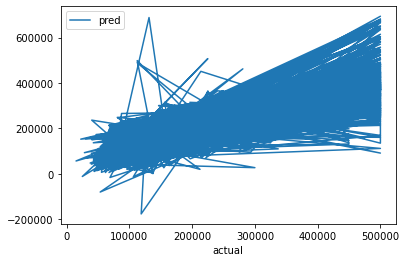

In [253]:
pred_df.plot(x='actual',y='pred')

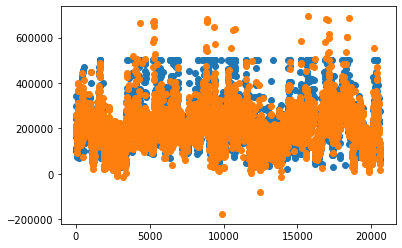

In [256]:
%matplotlib inline

import matplotlib.pyplot as plt
plt.plot(pred_df.actual, 'o')
plt.plot(pred_df.pred, 'o')


In [196]:
# bonus exerice - extract relevant vars

In [199]:
model=LinearRegression(fit_intercept=True)
model.fit(x_train,y_train)

y_pred_n=model.predict(x_test)

In [200]:
pred_df_n=pd.DataFrame({'actual': y_test, 'pred': y_pred_n,})

<AxesSubplot:xlabel='actual'>

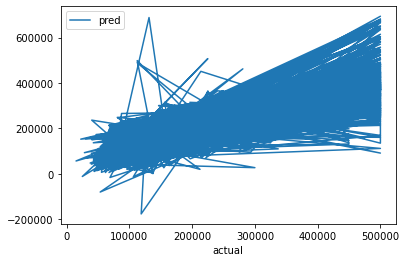

In [252]:
pred_df.plot(x='actual',y='pred')

In [202]:
model.score(x_test,y_test)

0.6375071818640171